# Import libraries

In [1]:
import sys
import math
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt

# DataSet Loading And Pre-Processing

In [2]:
# File upload
from google.colab import files
uploaded = files.upload()

Saving data_k_mean.txt to data_k_mean.txt


In [3]:
data = np.loadtxt('/content/data_k_mean.txt')
data

array([[-7.87157, -4.86573],
       [-4.76661, -6.87944],
       [-6.67986, -5.8308 ],
       ...,
       [ 6.91832, -0.32132],
       [-8.23828, -4.00405],
       [-5.75112, -5.99531]])

In [4]:
X = data[:,0]
Y = data[:,1]

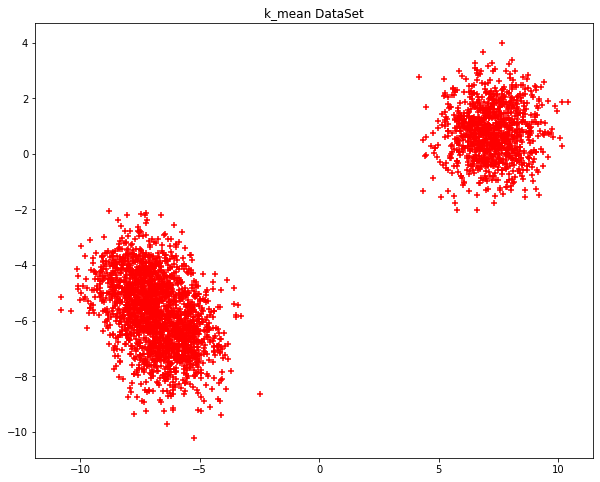

In [5]:
fig, ax = plt.subplots(1,1,squeeze=True)
fig.set_size_inches(10,8)
plt.title('k_mean DataSet')
ax.scatter(X,Y,marker='+',color='r')
plt.show()

# K-means Clustering

In [16]:
def distance(p1,p2):
  return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

def initMean():
    rows = data.shape[0]
    index = np.random.choice(rows, size=1, replace=False)
    random_rows = data[index,:]
    x=random_rows[0][0];
    y=random_rows[0][1];
    return x,y

def mean(cluster):
    xcol, ycol, mx, my = 0,0,0,0
    for idx in cluster:
        xcol += data[idx][0]
        ycol += data[idx][1]
    tot=len(cluster)
    if tot<1:
      tot=1 
    mx=xcol/tot
    my=ycol/tot
    return mx,my

def cluster(means,k):
    cluster=[]
    for i in range(k):
      i_list=[]
      cluster.append(i_list)
    for idx in range(len(data)):
      m_dis=sys.maxsize
      n_clus=-1
      for j in range(k):
        dis=distance(means[j],data[idx])
        if(dis<m_dis):
          m_dis = dis
          n_clus = j
      cluster[n_clus].append(idx)
    return cluster

def update(prev,new,k):
    for idx in range(k):
      if(len(prev[idx])!=len(new[idx])):
        return 0
    for idx in range(k):
      for j in range(len(prev[idx])):
        if(prev[idx][j]!=new[idx][j]):
          return 0
    return 1

def k_means_algorithm(k):
  centroids = []
  for idx in range(k):
    centroids.append([idx])
  toggle=0
  while(True):
    new_mean = []
    for it in range(k):
      if toggle==0:
        new_mean.append(initMean())
      else:
        new_mean.append(mean(centroids[it]))
    toggle=1
    state_now = cluster(new_mean,k)
    check = update(centroids,state_now,k)
    if check==1:
      break

    centroids = state_now.copy()
  return centroids

In [25]:
# Enter value of K 
k = int(input('Enter K:'))
values=k_means_algorithm(k)

Enter K:10


# Visualize Output

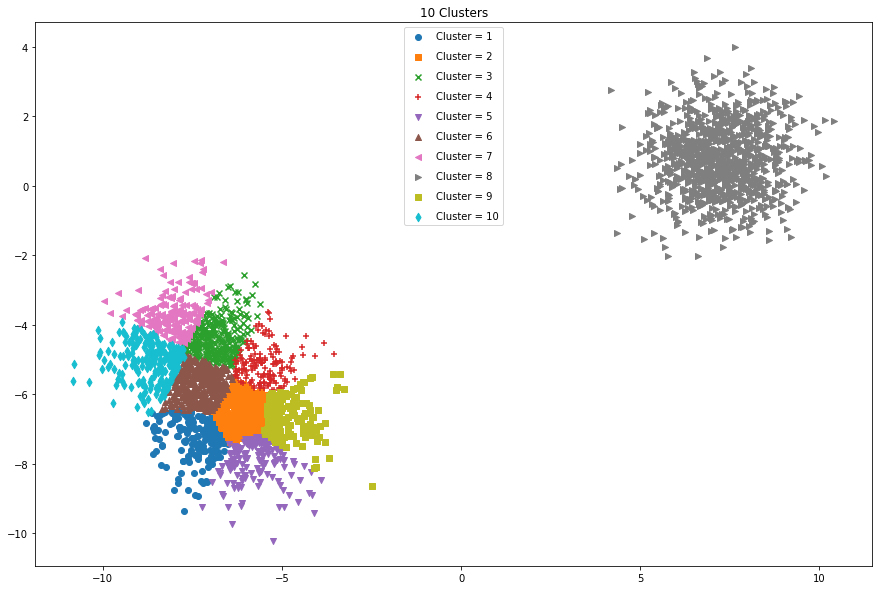

In [26]:
marker = ['o', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'] 
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

X_data, Y_data = [], []

for idx in range(k):
  x_arr, y_arr = [], []
  X_data.append(x_arr)
  Y_data.append(y_arr)

for idx in range(k):
  for jdx in values[idx]:
    X_data[idx].append(data[jdx][0])
    Y_data[idx].append(data[jdx][1])


fig, ax = plt.subplots(1,1,squeeze=True)
fig.set_size_inches(15,10)
plt.title(str(k)+' Clusters')
for idx in range(k):
  ax.scatter(X_data[idx],Y_data[idx],marker=marker[idx],color=color[idx],label="Cluster = "+str(idx+1))
legend = ax.legend(loc='upper center', shadow=False, fontsize='medium',labelspacing=1)
legend.get_frame().set_facecolor('None')
plt.show()
